In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix , precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
df = pd.read_csv("/content/test.csv")

print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking    

In [2]:
missing_values_before = df.isnull().sum()

# Display only columns with missing values
print("Missing Values Before Cleaning:")
print(missing_values_before[missing_values_before > 0])

Missing Values Before Cleaning:
Arrival Delay in Minutes    83
dtype: int64


Data Cleaning

Drop Unnecessary Columns

In [3]:
# Dropping columns that are not required
df_cleaned = df.drop(columns=['Unnamed: 0', 'id'])


Handle Missing Values

In [4]:
# Fill missing values in 'Arrival Delay in Minutes' with median
df_cleaned['Arrival Delay in Minutes'].fillna(df_cleaned['Arrival Delay in Minutes'].median(), inplace=True)


<ipython-input-4-28eea0fa0c37>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Arrival Delay in Minutes'].fillna(df_cleaned['Arrival Delay in Minutes'].median(), inplace=True)


Convert Target Variable to Numeric

In [5]:
# Convert 'satisfaction' to numeric format
df_cleaned['satisfaction'] = df_cleaned['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})


Standardize Categorical Features

In [6]:
# Convert categorical columns to category type
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_cleaned[categorical_features] = df_cleaned[categorical_features].astype('category')


Remove Duplicate Records

In [7]:
# Remove duplicate rows if any
df_cleaned.drop_duplicates(inplace=True)


Convert Column Names to Lowercase

In [8]:
# Convert column names to lowercase for consistency
df_cleaned.columns = df_cleaned.columns.str.lower()


Ensure Proper Data Types

In [9]:
# Ensure all numeric columns have correct data types
df_cleaned.select_dtypes(include=['object']).apply(lambda x: x.str.strip())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[25976 rows x 0 columns]

Check for Outliers

In [10]:
# Describe numerical columns to check for outliers
df_cleaned.describe()


age  flight distance  inflight wifi service  \
count  25976.000000     25976.000000           25976.000000   
mean      39.620958      1193.788459               2.724746   
std       15.135685       998.683999               1.335384   
min        7.000000        31.000000               0.000000   
25%       27.000000       414.000000               2.000000   
50%       40.000000       849.000000               3.000000   
75%       51.000000      1744.000000               4.000000   
max       85.000000      4983.000000               5.000000   

       departure/arrival time convenient  ease of online booking  \
count                       25976.000000            25976.000000   
mean                            3.046812                2.756775   
std                             1.533371                1.412951   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       gate location  food and drink  online boarding  seat comfort  \
count   25976.000000    25976.000000     25976.000000  25976.000000   
mean        2.977094        3.215353         3.261665      3.449222   
std         1.282133        1.331506         1.355536      1.320090   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         4.000000      4.000000   
75%         4.000000        4.000000         4.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       inflight entertainment  on-board service  leg room service  \
count            25976.000000      25976.000000      25976.000000   
mean                 3.357753          3.385664          3.350169   
std                  1.338299          1.282088          1.318862   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       baggage handling  checkin service  inflight service   cleanliness  \
count      25976.000000     25976.000000      25976.000000  25976.000000   
mean           3.633238         3.314175          3.649253      3.286226   
std            1.176525         1.269332          1.180681      1.319330   
min            1.000000         1.000000          0.000000      0.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       departure delay in minutes  arrival delay in minutes  satisfaction  
count                 25976.00000              25976.000000  25976.000000  
mean                     14.30609                 14.693756      0.438982  
std                      37.42316                 37.466787      0.496272  
min                       0.00000                  0.000000      0.000000  
25%                       0.00000                  0.000000      0.000000  
50%                       0.00000                  0.000000      0.000000  
75%                      12.00000                 13.000000      1.000000  
max                    1128.00000               1115.000000      1.000000

Remove Spaces in Categorical Values

In [11]:
# Convert categorical feature names to lowercase
categorical_features = ['gender', 'customer type', 'type of travel', 'class']

# Strip whitespace from categorical values
df_cleaned[categorical_features] = df_cleaned[categorical_features].apply(lambda x: x.str.strip())


In [12]:
missing_values = df_cleaned.isnull().sum()

# Display only columns with missing values
print("Missing Values in Cleaned Dataset:")
print(missing_values[missing_values > 0])

Missing Values in Cleaned Dataset:
Series([], dtype: int64)


Final Verification of Cleaned Dataset

In [13]:
# Final dataset check
print("\nFinal Cleaned Dataset Info:")
df_cleaned.info()
print("\nFirst 5 rows of Cleaned Data:")
print(df_cleaned.head())



Final Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             25976 non-null  object 
 1   customer type                      25976 non-null  object 
 2   age                                25976 non-null  int64  
 3   type of travel                     25976 non-null  object 
 4   class                              25976 non-null  object 
 5   flight distance                    25976 non-null  int64  
 6   inflight wifi service              25976 non-null  int64  
 7   departure/arrival time convenient  25976 non-null  int64  
 8   ease of online booking             25976 non-null  int64  
 9   gate location                      25976 non-null  int64  
 10  food and drink                     25976 non-null  int64  
 11  online boarding          

# EDA

Class Distribution Analysis

<ipython-input-14-5b9e77b6a062>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




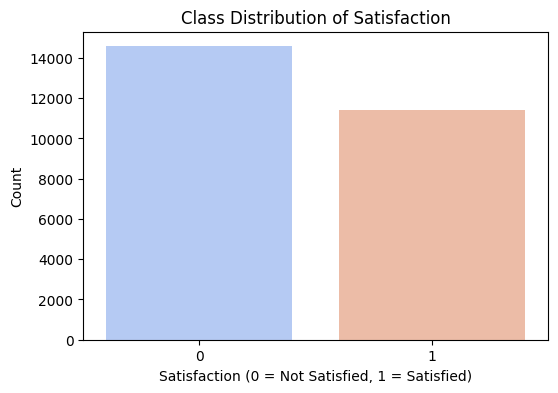

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = px.pie(df, names='satisfaction', title='Distribution of Passenger Satisfaction', hole=0.3)
fig.show()
# Count plot for satisfaction levels
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['satisfaction'], palette="coolwarm")
plt.title("Class Distribution of Satisfaction")
plt.xlabel("Satisfaction (0 = Not Satisfied, 1 = Satisfied)")
plt.ylabel("Count")
plt.show()


Compute & Visualize Correlation Matrix

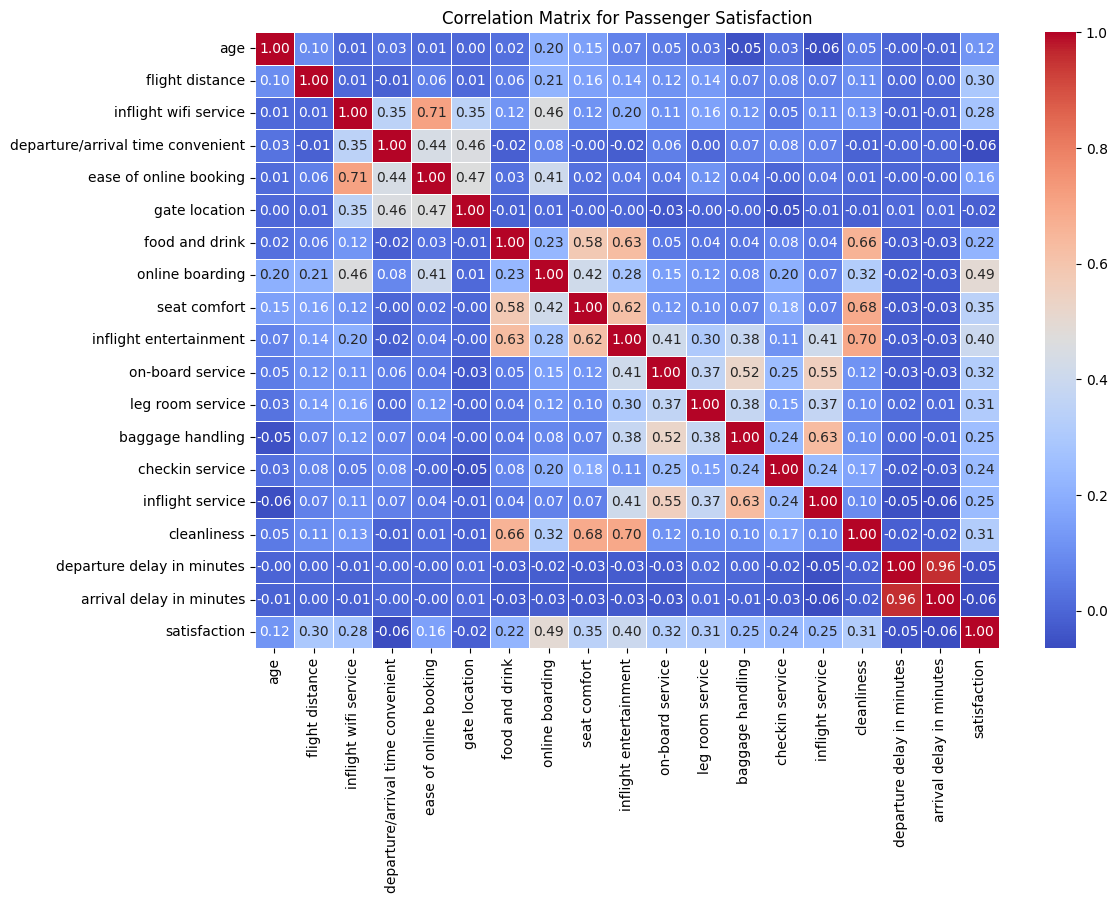

In [15]:
# Compute correlation matrix
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_cleaned[numeric_features].corr()

# Heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Passenger Satisfaction")
plt.show()


Boxplot of Flight Distance vs. Satisfaction

<ipython-input-16-b3ce72bad371>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




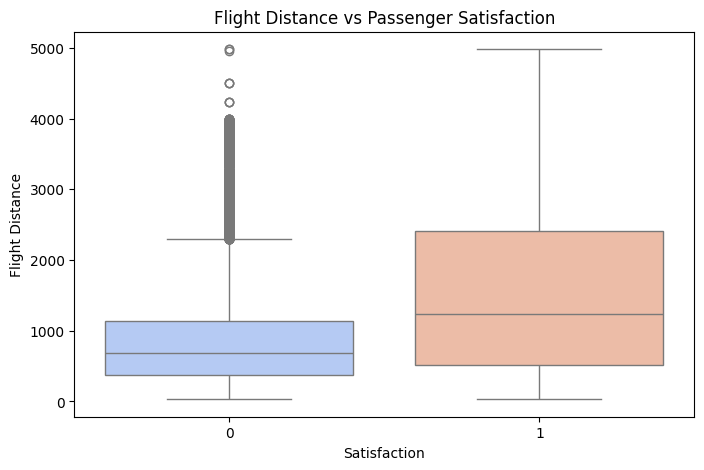

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['satisfaction'], y=df_cleaned['flight distance'], palette="coolwarm")
plt.title("Flight Distance vs Passenger Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")
plt.show()


Boxplot of Inflight Entertainment vs. Satisfaction

<ipython-input-17-b86fa909d68c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




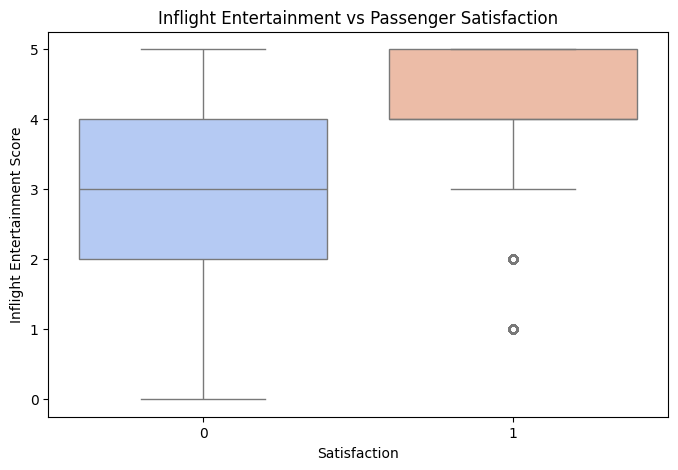

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['satisfaction'], y=df_cleaned['inflight entertainment'], palette="coolwarm")
plt.title("Inflight Entertainment vs Passenger Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Inflight Entertainment Score")
plt.show()


Impact of Seat Comfort on Satisfaction

<ipython-input-18-163a12968867>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




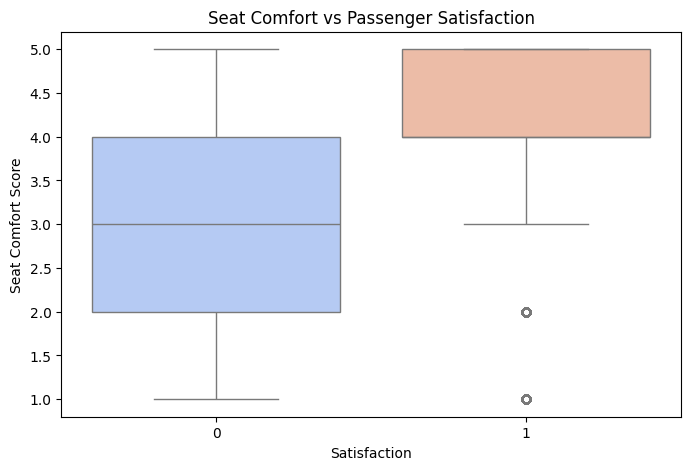

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['satisfaction'], y=df_cleaned['seat comfort'], palette="coolwarm")
plt.title("Seat Comfort vs Passenger Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Seat Comfort Score")
plt.show()


Distribution of Customer Loyalty

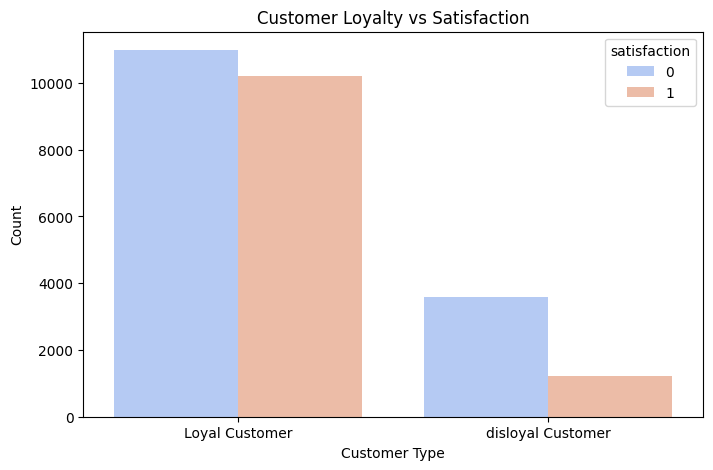

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_cleaned['customer type'], hue=df_cleaned['satisfaction'], palette="coolwarm")
plt.title("Customer Loyalty vs Satisfaction")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()


Type of Travel vs. Satisfaction

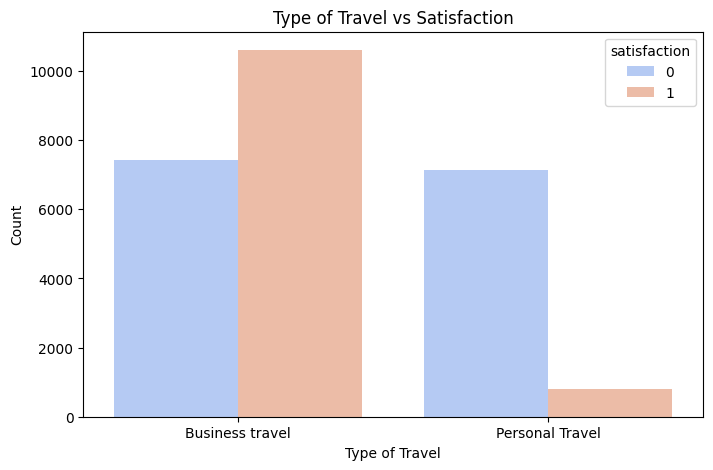

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_cleaned['type of travel'], hue=df_cleaned['satisfaction'], palette="coolwarm")
plt.title("Type of Travel vs Satisfaction")
plt.xlabel("Type of Travel")
plt.ylabel("Count")
plt.show()


Class Type vs. Satisfaction

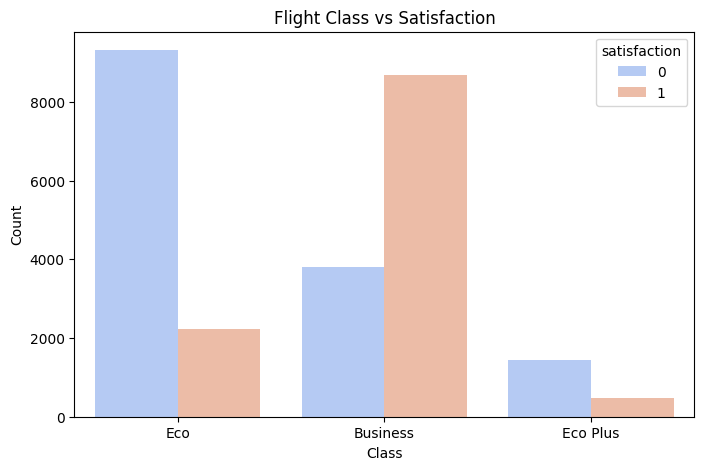

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_cleaned['class'], hue=df_cleaned['satisfaction'], palette="coolwarm")
plt.title("Flight Class vs Satisfaction")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Departure & Arrival Delays Impact

<ipython-input-22-ef44aa80d578>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




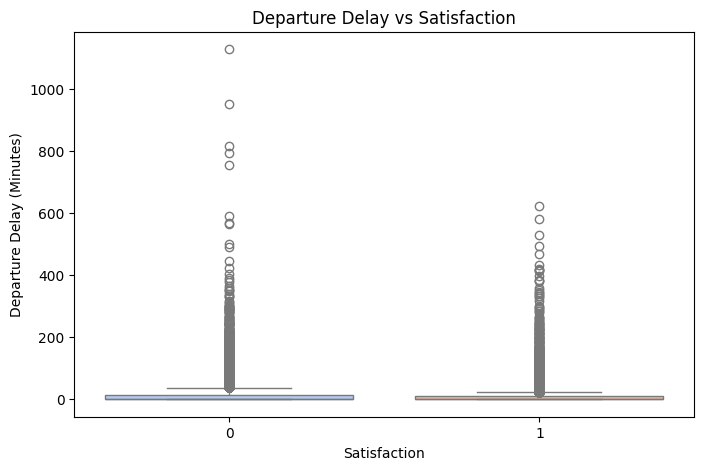

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['satisfaction'], y=df_cleaned['departure delay in minutes'], palette="coolwarm")
plt.title("Departure Delay vs Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Departure Delay (Minutes)")
plt.show()


Feature Importance Analysis Using Random Forest

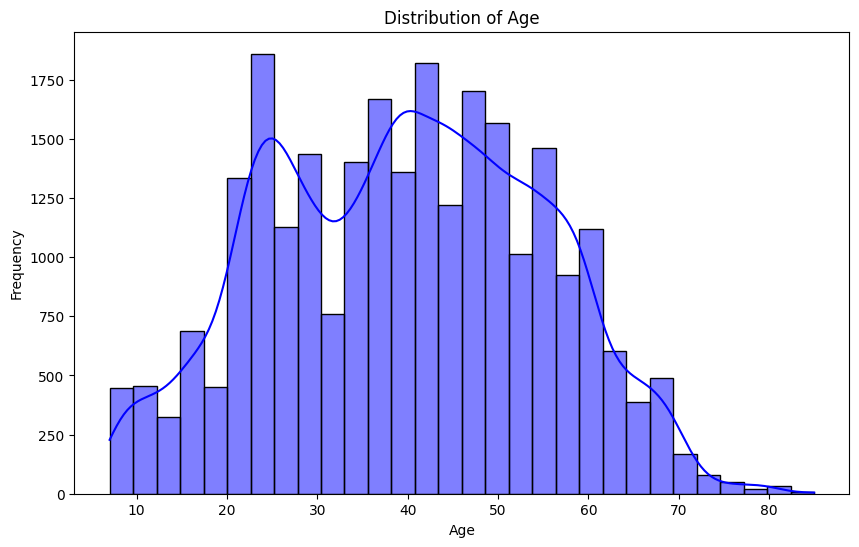

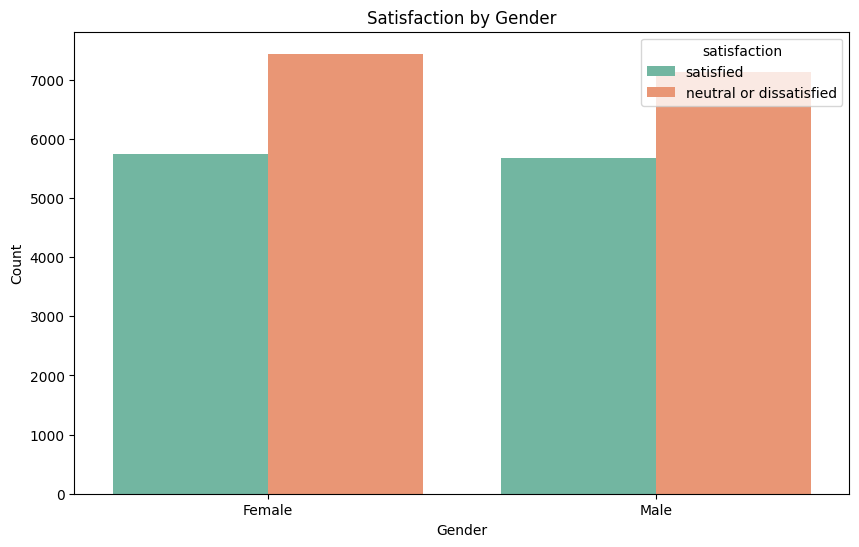

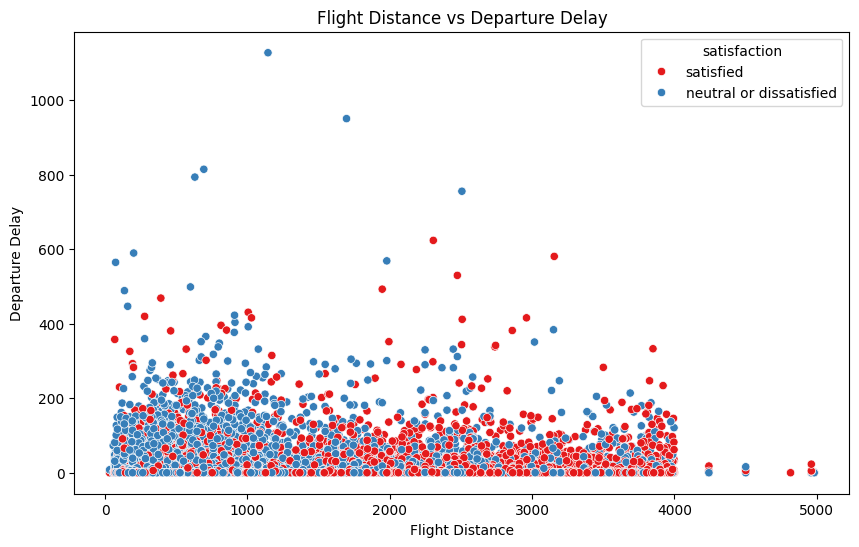

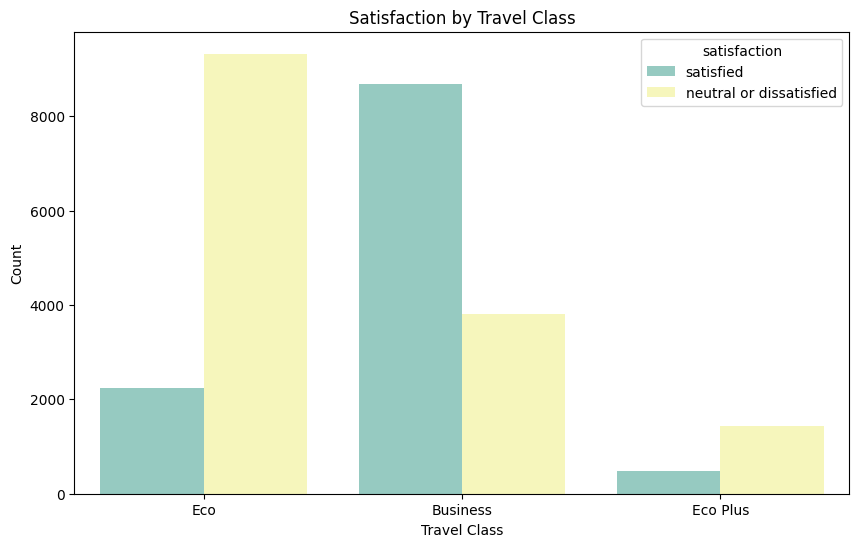

In [23]:
import numpy as np






numeric_features = df.select_dtypes(include=[np.number]).columns
fig = px.scatter_matrix(df[numeric_features], dimensions=numeric_features[:6], color='Cleanliness')
fig.update_layout(title='Pairplot of Numeric Features Colored by Cleanliness')
fig.show()

fig = px.box(df, x='satisfaction', y='Flight Distance', color='satisfaction', points="all")
fig.update_layout(title='Flight Distance Distribution by Satisfaction')
fig.show()


fig = px.scatter_3d(df, x='Age', y='Flight Distance', z='Departure Delay in Minutes', color='satisfaction',
                    title='3D Scatter Plot of Age, Flight Distance, and Departure Delay')
fig.show()

fig = px.sunburst(df, path=['Customer Type', 'Class'], values='id', color='satisfaction',
                  title='Sunburst Chart of Customer Type and Class')
fig.show()

fig = px.violin(df, x='satisfaction', y='Age', box=True, points="all", title='Age Distribution by Satisfaction')
fig.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='satisfaction', data=df, palette='Set2')
plt.title('Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', data=df, palette='Set1')
plt.title('Flight Distance vs Departure Delay')
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='satisfaction', data=df, palette='Set3')
plt.title('Satisfaction by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Count')
plt.show()

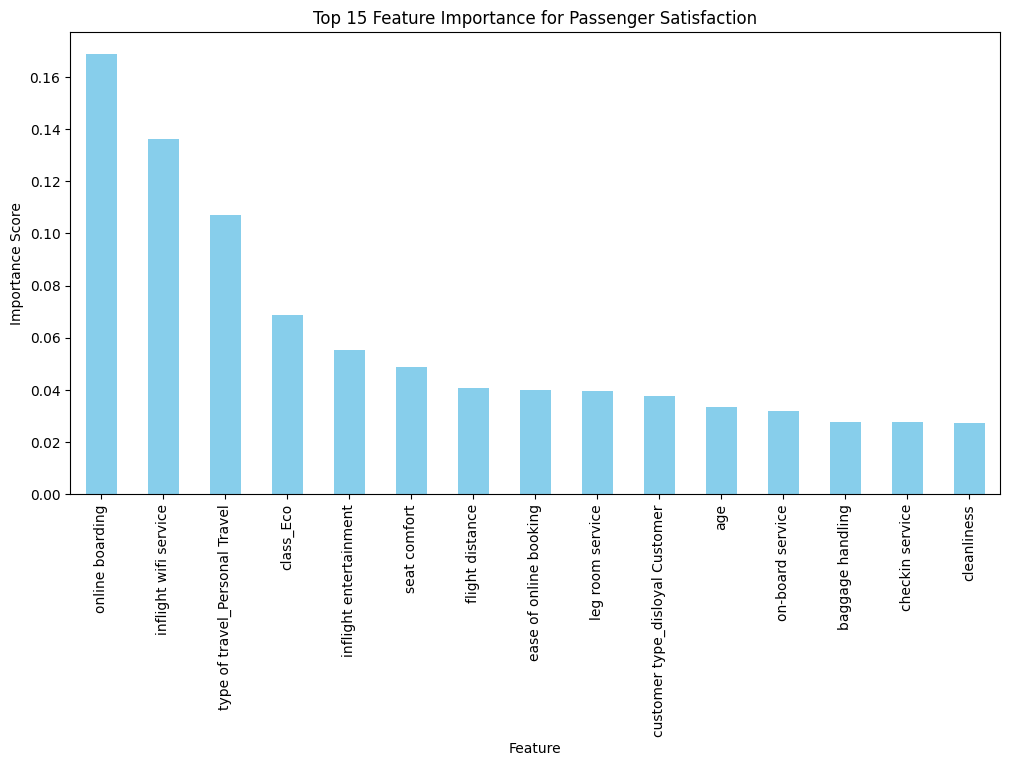

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data for modeling
X = df_cleaned.drop(columns=['satisfaction'])  # Features
y = df_cleaned['satisfaction']  # Target

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importance
importances = rf_model.feature_importances_

# Convert to Pandas Series for visualization
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12,6))
feature_importance.head(15).plot(kind='bar', color="skyblue")
plt.title("Top 15 Feature Importance for Passenger Satisfaction")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


In [25]:
columns_to_scale = ['flight distance', 'age', 'departure delay in minutes', 'arrival delay in minutes']  # Changed to lowercase
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 86.61%
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2945
           1       0.85      0.83      0.84      2251

    accuracy                           0.87      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.87      0.87      0.87      5196



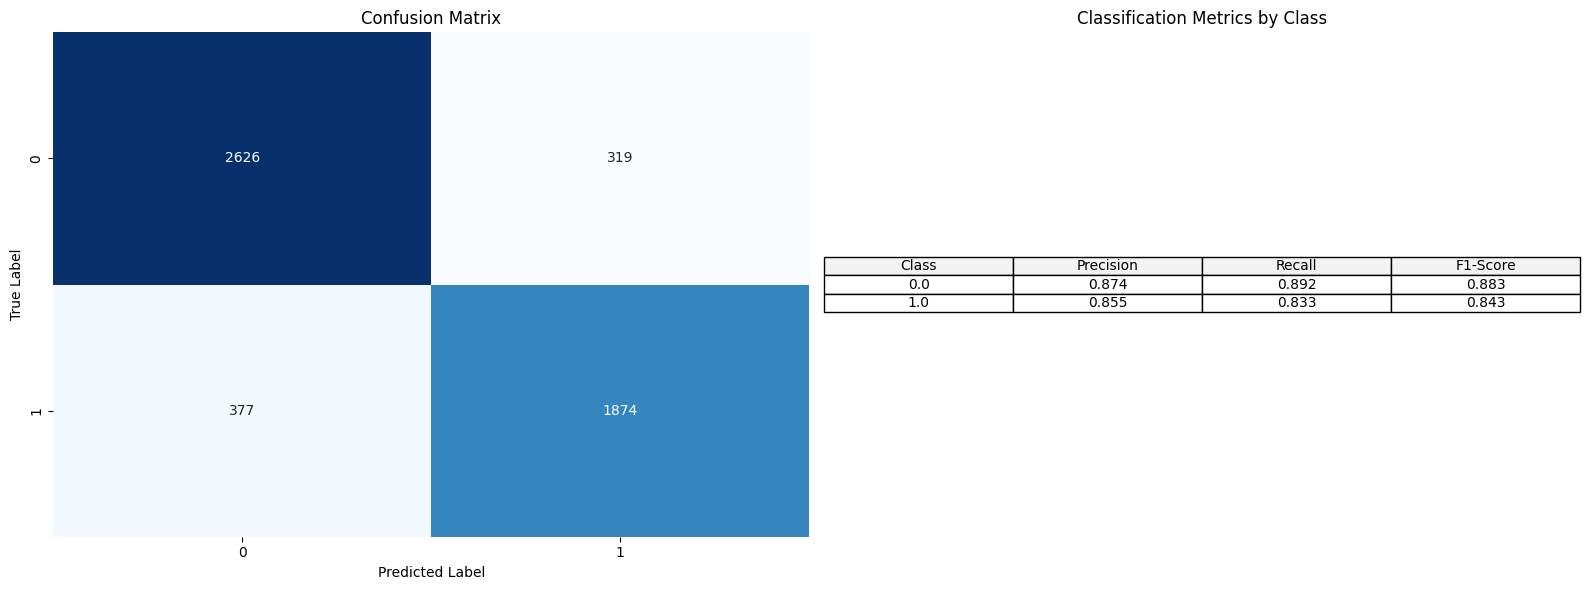

<Figure size 1000x800 with 0 Axes>

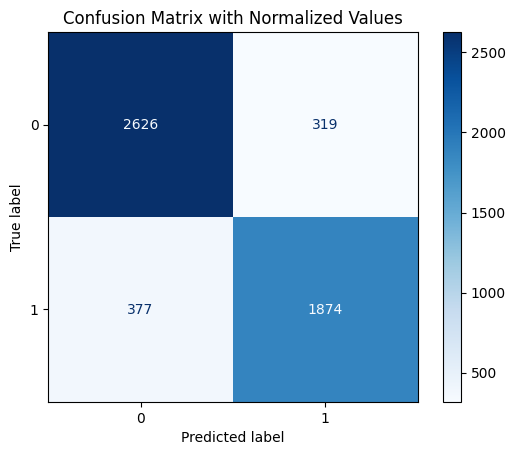

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_log_reg, average=None)
class_names = log_reg.classes_

import pandas as pd
import numpy as np

metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': np.round(precision, 3),
    'Recall': np.round(recall, 3),
    'F1-Score': np.round(f1, 3)
})

plt.subplot(1, 2, 2)
plt.axis('off')
plt.table(cellText=metrics_df.values,
          colLabels=metrics_df.columns,
          loc='center',
          cellLoc='center',
          colColours=['#f2f2f2']*len(metrics_df.columns))
plt.title('Classification Metrics by Class')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix with Normalized Values')
plt.grid(False)
plt.show()

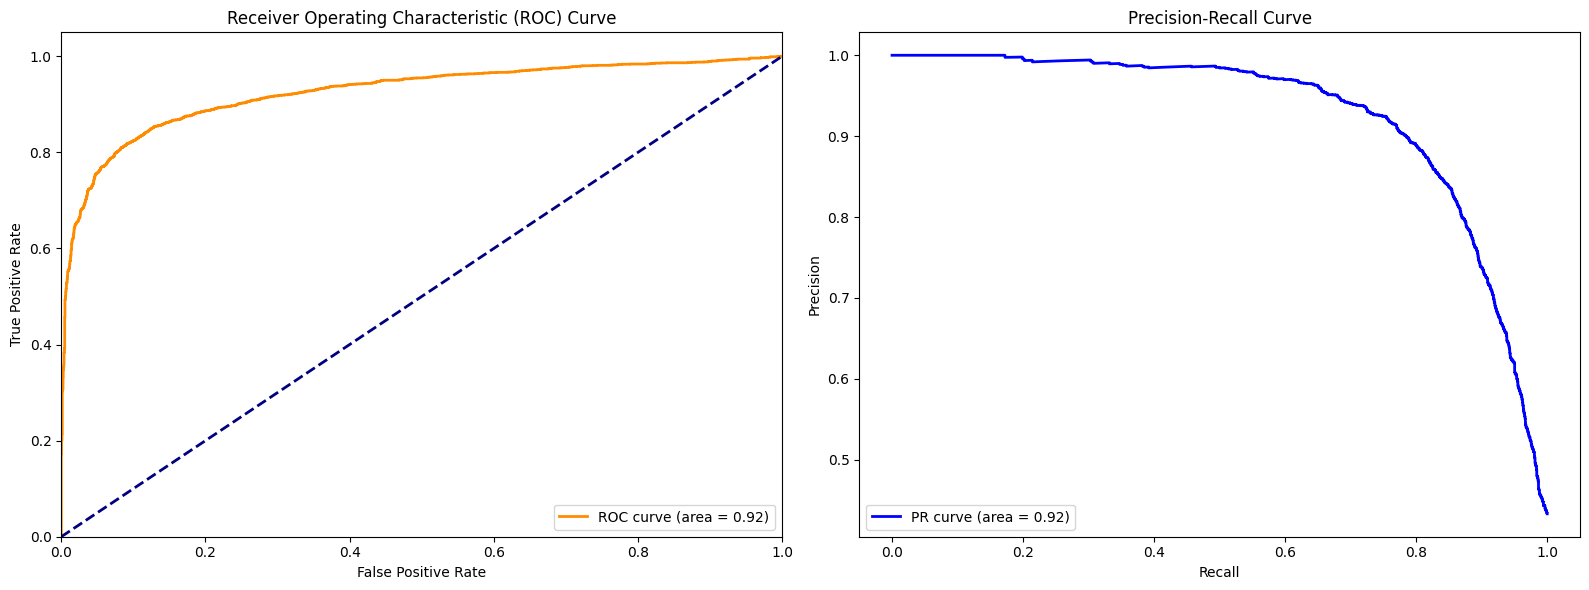

In [28]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

if len(class_names) == 2:
    y_probs = log_reg.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall_curve, precision_curve)

    plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

Random Forest Accuracy: 95.19%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2945
           1       0.95      0.94      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



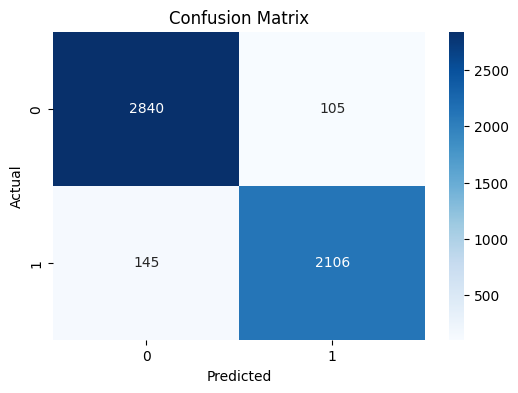

Precision: 0.95
Recall: 0.95
F1-score: 0.95


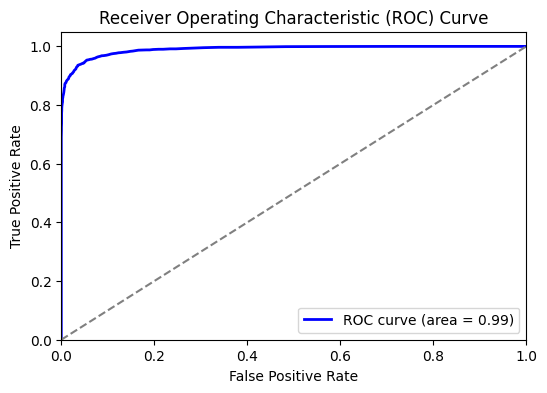

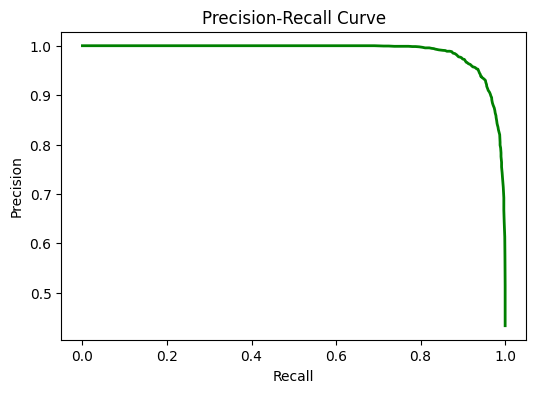

In [29]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

print(classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

if len(set(y_test)) == 2:
    if len(set(y_test)) == 2:
        y_pred_prob = rf_clf.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

XGBoost Accuracy: 95.67%
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2945
           1       0.96      0.94      0.95      2251

    accuracy                           0.96      5196
   macro avg       0.96      0.95      0.96      5196
weighted avg       0.96      0.96      0.96      5196



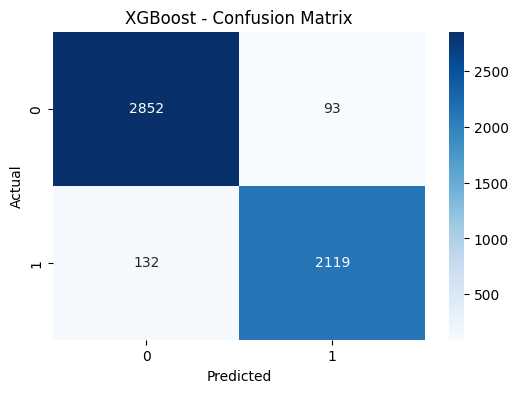

Precision: 0.96
Recall: 0.96
F1-score: 0.96


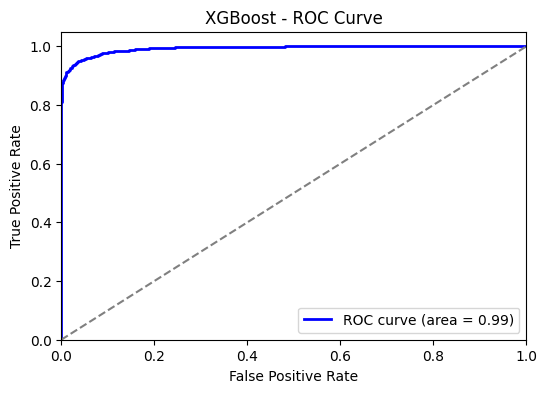

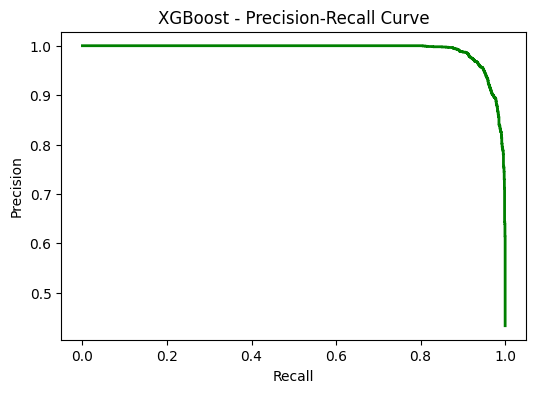

In [30]:
xgb_clf = XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

print(classification_report(y_test, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f'Precision: {precision_xgb:.2f}')
print(f'Recall: {recall_xgb:.2f}')
print(f'F1-score: {f1_xgb:.2f}')

if len(set(y_test)) == 2:
    y_pred_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_prob_xgb)

    plt.figure(figsize=(6, 4))
    plt.plot(recall_xgb, precision_xgb, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('XGBoost - Precision-Recall Curve')
    plt.show()

In [31]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%')
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 92.82%
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2945
           1       0.91      0.93      0.92      2251

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196



In [33]:
from sklearn.calibration import calibration_curve
y_pred_dt = dt_clf.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
fig = px.imshow(cm_dt, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="Decision Tree: Confusion Matrix (Interactive)")
fig.show()


y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_dt, y=tpr_dt, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier',
                         line=dict(dash='dash')))
fig.update_layout(title=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()


precision_dt, recall_dt, thresholds_pr_dt = precision_recall_curve(y_test, y_proba_dt)
avg_precision_dt = average_precision_score(y_test, y_proba_dt)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_dt, y=precision_dt, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'Decision Tree Precision-Recall Curve (AP = {avg_precision_dt:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()


prob_true_dt, prob_pred_dt = calibration_curve(y_test, y_proba_dt, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_dt, y=prob_true_dt, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration',
                         line=dict(dash='dash')))
fig.update_layout(title='Decision Tree Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()


In [34]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%')
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 91.47%
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2945
           1       0.92      0.88      0.90      2251

    accuracy                           0.91      5196
   macro avg       0.92      0.91      0.91      5196
weighted avg       0.92      0.91      0.91      5196



In [35]:
from sklearn.calibration import calibration_curve
cm_knn = confusion_matrix(y_test, y_pred_knn)


fig = px.imshow(cm_knn, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="k-NN: Confusion Matrix (Interactive)")
fig.show()


y_proba_knn = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'KNN ROC Curve (AUC = {roc_auc:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_knn)
avg_precision = average_precision_score(y_test, y_proba_knn)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'KNN Precision-Recall Curve (AP = {avg_precision:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()


prob_true, prob_pred = calibration_curve(y_test, y_proba_knn, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred, y=prob_true, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='KNN Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()


In [36]:
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(f'SVC Accuracy: {accuracy_score(y_test, y_pred_svc) * 100:.2f}%')
print(classification_report(y_test, y_pred_svc))


SVC Accuracy: 93.15%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2945
           1       0.93      0.91      0.92      2251

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196



In [37]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
fig = px.imshow(cm_svc, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="SVC: Confusion Matrix (Interactive)")
fig.show()

y_proba_svc = svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_svc, y=tpr_svc, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'SVC ROC Curve (AUC = {roc_auc_svc:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_svc, recall_svc, thresholds_pr_svc = precision_recall_curve(y_test, y_proba_svc)
avg_precision_svc = average_precision_score(y_test, y_proba_svc)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_svc, y=precision_svc, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'SVC Precision-Recall Curve (AP = {avg_precision_svc:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_svc, prob_pred_svc = calibration_curve(y_test, y_proba_svc, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_svc, y=prob_true_svc, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='SVC Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [38]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f'Gaussian NB Accuracy: {accuracy_score(y_test, y_pred_gnb) * 100:.2f}%')
print(classification_report(y_test, y_pred_gnb))


Gaussian NB Accuracy: 84.91%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2945
           1       0.84      0.81      0.82      2251

    accuracy                           0.85      5196
   macro avg       0.85      0.84      0.85      5196
weighted avg       0.85      0.85      0.85      5196



In [39]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
fig = px.imshow(cm_gnb, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="Gaussian NB: Confusion Matrix (Interactive)")
fig.show()


y_proba_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_gnb, y=tpr_gnb, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'Gaussian NB ROC Curve (AUC = {roc_auc_gnb:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_gnb, recall_gnb, thresholds_pr_gnb = precision_recall_curve(y_test, y_proba_gnb)
avg_precision_gnb = average_precision_score(y_test, y_proba_gnb)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_gnb, y=precision_gnb, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'Gaussian NB Precision-Recall Curve (AP = {avg_precision_gnb:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_gnb, prob_pred_gnb = calibration_curve(y_test, y_proba_gnb, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_gnb, y=prob_true_gnb, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='Gaussian NB Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [40]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print(f'AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada) * 100:.2f}%')
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 91.94%
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2945
           1       0.91      0.90      0.91      2251

    accuracy                           0.92      5196
   macro avg       0.92      0.92      0.92      5196
weighted avg       0.92      0.92      0.92      5196



In [41]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
fig = px.imshow(cm_ada, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="AdaBoost: Confusion Matrix (Interactive)")
fig.show()


y_proba_ada = ada.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_ada, y=tpr_ada, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'AdaBoost ROC Curve (AUC = {roc_auc_ada:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_ada, recall_ada, thresholds_pr_ada = precision_recall_curve(y_test, y_proba_ada)
avg_precision_ada = average_precision_score(y_test, y_proba_ada)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_ada, y=precision_ada, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'AdaBoost Precision-Recall Curve (AP = {avg_precision_ada:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_ada, prob_pred_ada = calibration_curve(y_test, y_proba_ada, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_ada, y=prob_true_ada, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='AdaBoost Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [42]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb) * 100:.2f}%')
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 93.82%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2945
           1       0.94      0.92      0.93      2251

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



In [43]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
fig = px.imshow(cm_gb, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="Gradient Boosting: Confusion Matrix (Interactive)")
fig.show()

y_proba_gb = gb_clf.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'Gradient Boosting ROC Curve (AUC = {roc_auc_gb:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_gb, recall_gb, thresholds_pr_gb = precision_recall_curve(y_test, y_proba_gb)
avg_precision_gb = average_precision_score(y_test, y_proba_gb)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_gb, y=precision_gb, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'Gradient Boosting Precision-Recall Curve (AP = {avg_precision_gb:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_gb, prob_pred_gb = calibration_curve(y_test, y_proba_gb, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_gb, y=prob_true_gb, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='Gradient Boosting Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [44]:
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred_et = et_clf.predict(X_test)
print(f'Extra Trees Accuracy: {accuracy_score(y_test, y_pred_et) * 100:.2f}%')
print(classification_report(y_test, y_pred_et))


Extra Trees Accuracy: 95.03%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2945
           1       0.96      0.93      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



In [45]:
cm_et = confusion_matrix(y_test, y_pred_et)
fig = px.imshow(cm_et, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="Extra Trees: Confusion Matrix (Interactive)")
fig.show()


y_proba_et = et_clf.predict_proba(X_test)[:, 1]
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_proba_et)
roc_auc_et = auc(fpr_et, tpr_et)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_et, y=tpr_et, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'Extra Trees ROC Curve (AUC = {roc_auc_et:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_et, recall_et, thresholds_pr_et = precision_recall_curve(y_test, y_proba_et)
avg_precision_et = average_precision_score(y_test, y_proba_et)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_et, y=precision_et, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'Extra Trees Precision-Recall Curve (AP = {avg_precision_et:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_et, prob_pred_et = calibration_curve(y_test, y_proba_et, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_et, y=prob_true_et, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='Extra Trees Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [46]:
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(f'MLP Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100:.2f}%')
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 93.82%
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2945
           1       0.90      0.96      0.93      2251

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



In [47]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
fig = px.imshow(cm_mlp, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="MLP: Confusion Matrix (Interactive)")
fig.show()


y_proba_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_mlp, y=tpr_mlp, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'MLP ROC Curve (AUC = {roc_auc_mlp:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_mlp, recall_mlp, thresholds_pr_mlp = precision_recall_curve(y_test, y_proba_mlp)
avg_precision_mlp = average_precision_score(y_test, y_proba_mlp)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_mlp, y=precision_mlp, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'MLP Precision-Recall Curve (AP = {avg_precision_mlp:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_mlp, prob_pred_mlp = calibration_curve(y_test, y_proba_mlp, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_mlp, y=prob_true_mlp, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='MLP Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [48]:
sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print("SGD Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_sgd)*100))
print(classification_report(y_test, y_pred_sgd))


SGD Classifier Accuracy: 86.66%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2945
           1       0.86      0.82      0.84      2251

    accuracy                           0.87      5196
   macro avg       0.87      0.86      0.86      5196
weighted avg       0.87      0.87      0.87      5196



In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve
import plotly.express as px
import plotly.graph_objects as go


cm_sgd = confusion_matrix(y_test, y_pred_sgd)
fig = px.imshow(cm_sgd, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="SGD Classifier: Confusion Matrix (Interactive)")
fig.show()

y_proba_sgd = sgd.predict_proba(X_test)[:, 1]
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_proba_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_sgd, y=tpr_sgd, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'SGD Classifier ROC Curve (AUC = {roc_auc_sgd:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_sgd, recall_sgd, thresholds_pr_sgd = precision_recall_curve(y_test, y_proba_sgd)
avg_precision_sgd = average_precision_score(y_test, y_proba_sgd)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_sgd, y=precision_sgd, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'SGD Classifier Precision-Recall Curve (AP = {avg_precision_sgd:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()


prob_true_sgd, prob_pred_sgd = calibration_curve(y_test, y_proba_sgd, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_sgd, y=prob_true_sgd, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='SGD Classifier Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()


In [53]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Ensemble Classifier Accuracy: {:.2f}%".format(accuracy_stack * 100))
print(classification_report(y_test, y_pred_stack))


Stacking Ensemble Classifier Accuracy: 95.05%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2945
           1       0.95      0.94      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



In [54]:
cm_stack = confusion_matrix(y_test, y_pred_stack)
fig = px.imshow(cm_stack, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="Stacking Ensemble: Confusion Matrix (Interactive)")
fig.show()

y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stack, tpr_stack, thresholds_stack = roc_curve(y_test, y_proba_stack)
roc_auc_stack = auc(fpr_stack, tpr_stack)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_stack, y=tpr_stack, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'Stacking Ensemble ROC Curve (AUC = {roc_auc_stack:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_stack, recall_stack, thresholds_pr_stack = precision_recall_curve(y_test, y_proba_stack)
avg_precision_stack = average_precision_score(y_test, y_proba_stack)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_stack, y=precision_stack, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'Stacking Ensemble Precision-Recall Curve (AP = {avg_precision_stack:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_stack, prob_pred_stack = calibration_curve(y_test, y_proba_stack, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_stack, y=prob_true_stack, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='Stacking Ensemble Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()

In [55]:
!pip install catboost


In [56]:
estimators = [
    ('lgb', LGBMClassifier(n_estimators=200, random_state=42)),
    ('cat', CatBoostClassifier(n_estimators=200, random_state=42, verbose=0)),
    ('et', ExtraTreesClassifier(n_estimators=200, random_state=42))
]

stacking_clf_big = StackingClassifier(
    estimators=estimators,
    final_estimator=MLPClassifier(max_iter=500, random_state=42),
    cv=5
)

stacking_clf_big.fit(X_train, y_train)
y_pred_stack_big = stacking_clf_big.predict(X_test)
accuracy_stack_big = accuracy_score(y_test, y_pred_stack_big)
print("Big Stacking Ensemble Accuracy: {:.2f}%".format(accuracy_stack_big * 100))
print(classification_report(y_test, y_pred_stack_big))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9152, number of negative: 11628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 20780, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440423 -> initscore=-0.239444
[LightGBM] [Info] Start training from score -0.239444
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7321, number of negative: 9303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

In [57]:
cm_stack_big = confusion_matrix(y_test, y_pred_stack_big)
fig = px.imshow(cm_stack_big, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="Predicted", y="Actual"), x=["0", "1"], y=["0", "1"])
fig.update_layout(title="Big Stacking Ensemble: Confusion Matrix (Interactive)")
fig.show()


y_proba_stack_big = stacking_clf_big.predict_proba(X_test)[:, 1]
fpr_stack_big, tpr_stack_big, thresholds_stack_big = roc_curve(y_test, y_proba_stack_big)
roc_auc_stack_big = auc(fpr_stack_big, tpr_stack_big)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_stack_big, y=tpr_stack_big, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title=f'Big Stacking Ensemble ROC Curve (AUC = {roc_auc_stack_big:.2f})',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

precision_stack_big, recall_stack_big, thresholds_pr_stack_big = precision_recall_curve(y_test, y_proba_stack_big)
avg_precision_stack_big = average_precision_score(y_test, y_proba_stack_big)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_stack_big, y=precision_stack_big, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title=f'Big Stacking Ensemble Precision-Recall Curve (AP = {avg_precision_stack_big:.2f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision')
fig.show()

prob_true_stack_big, prob_pred_stack_big = calibration_curve(y_test, y_proba_stack_big, n_bins=10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=prob_pred_stack_big, y=prob_true_stack_big, mode='markers+lines', name='Calibration'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Perfect Calibration', line=dict(dash='dash')))
fig.update_layout(title='Big Stacking Ensemble Calibration Plot',
                  xaxis_title='Mean Predicted Probability',
                  yaxis_title='Fraction of Positives')
fig.show()